# M3P04 CNN Bird Classification Project
--------

**Overview:** <br>

The goal of this project is to build an image classification model that can classify bird species from images. The dataset used for this project is the Bird Species dataset from Kaggle, containing images from 20 different bird species. The model will be trained to recognize and classify these bird species, with the objective of achieving at least 85% accuracy on the test set.<br>

Note: This project was done on Google Colab: <br>
- The 'images to predict', 'test', 'train' and 'valid' folders were saved in a new folder called 'Bird_Data' and uploaded into Google Drive.
- The directory paths for the dataset and for prediction were in Google Drive.

**Dataset Details:** <br> 

The dataset consists of images from 20 bird species. It is divided into three subsets for training, validation, and testing: <br>
- Training Set: 3208 images (approximately 160 images per species) <br>
- Validation Set: 100 images (5 images per species) <br>
- Test Set: 100 images (5 images per species) <br>
- Additionally, there is a set of "images to predict" that will be used to evaluate the final performance of the trained model. <br>

**Dataset link:** https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification/data
  
**Criteria Checklist:** <br>  
- Model: A pretrained VGG16 (CNN) model was used. Added layers and customized the model for data training and validation. 
- Accuracy: The model was able to achieve an accuracy of at least 85% on the test set.
- Final Evaluation: After training, the images in the "images to predict" folder was used to evaluate the final model's performance. 

**Approach:** <br> 

1. **Data Preprocessing:** <br> 
- Data Augmentation: Data augmentation techniques such as rotations, axis shift, flips etc. were used to make the model more robust and improve generalization.

2. **Model Selection:** <br> 
- A pretrained VGG16 model was used, and additional layers were added to customize the model for data training and validation. This model was used for image classification.

3. **Model Training:** <br>  
- The model was trained using the training set.
- The validation set was used during training to monitor and prevent overfitting.

4. **Evaluation:** <br>
- Evaluation was performed on the model using the test set to ensure that it meets the required accuracy (85%).

5. **Final Model Testing:** <br>
- After training, an image from the "images to predict" folder was used to evaluate the final performance of the model. This will help assess how well the model generalizes to unseen data.

In [29]:
# Imports

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image
import glob

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Define path to data directories

# Note: Saved 'images to predict', 'test', 'train' and 'valid' folders in a new folder called 'Bird_Data'.

train_dir = '/content/drive/MyDrive/Bird_Data/train/'
valid_dir = '/content/drive/MyDrive/Bird_Data/valid/'
test_dir = '/content/drive/MyDrive/Bird_Data/test/'
images_to_predict_dir = '/content/drive/MyDrive/Bird_Data/images to predict/'


# Want to see each folder and one of their contents (ex: ABBOTTS BABBLER)

print("For train_dir")
print(os.listdir(train_dir))
train_abbots_babbler_dir = os.path.join(train_dir, 'ABBOTTS BABBLER')
print(os.listdir(train_abbots_babbler_dir))

#Note: "dashed_line()" function is being used to seperate the outputs.
def dashed_line(length):
    print('-' * length)
dashed_line(150)

print("For valid_dir")
print(os.listdir(valid_dir))
valid_abbots_babbler_dir = os.path.join(valid_dir, 'ABBOTTS BABBLER')
print(os.listdir(valid_abbots_babbler_dir))

dashed_line(150)

print("For test_dir")
print(os.listdir(test_dir))
test_abbots_babbler_dir = os.path.join(test_dir, 'ABBOTTS BABBLER')
print(os.listdir(test_abbots_babbler_dir))

dashed_line(150)

print("For images_to_predict_dir")
print(os.listdir(images_to_predict_dir))

For train_dir
['AFRICAN FIREFINCH', 'ALBATROSS', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN PIED HORNBILL', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN PYGMY GOOSE', 'ABBOTTS BABBLER', 'AFRICAN OYSTER CATCHER', 'ABBOTTS BOOBY', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN GOLDFINCH', 'AMERICAN COOT', 'AMERICAN BITTERN', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALBERTS TOWHEE', 'AMERICAN KESTREL', 'AMERICAN FLAMINGO', 'AMERICAN AVOCET']
['117.jpg', '007.jpg', '058.jpg', '106.jpg', '040.jpg', '113.jpg', '073.jpg', '139.jpg', '138.jpg', '102.jpg', '044.jpg', '154.jpg', '051.jpg', '146.jpg', '003.jpg', '012.jpg', '155.jpg', '042.jpg', '080.jpg', '017.jpg', '043.jpg', '048.jpg', '104.jpg', '099.jpg', '038.jpg', '116.jpg', '023.jpg', '156.jpg', '126.jpg', '098.jpg', '147.jpg', '109.jpg', '039.jpg', '142.jpg', '091.jpg', '144.jpg', '145.jpg', '062.jpg', '066.jpg', '125.jpg', '072.jpg', '157.jpg', '162.jpg', '074.jpg', '065.jpg', '076.jpg', '016.jpg', '140.jpg', '021.jpg', '001.jpg', '163.j

154.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------


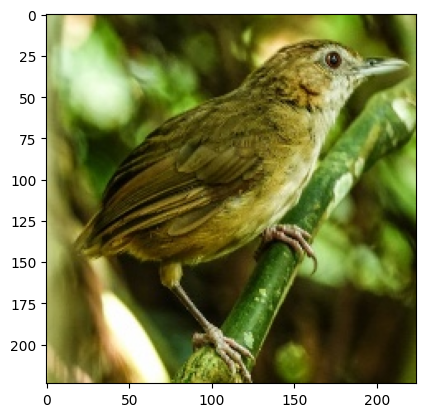

In [32]:
# Image view: train, 'ABBOTTS BABBLER', '012.jpg'

import matplotlib.pyplot as plt
from skimage.io import imread
import os


print(os.listdir(train_dir+ 'ABBOTTS BABBLER')[11])


dashed_line(150)

# Define the file path
train_ABBOTTS_BABBLER_12 = os.path.join(train_dir, 'ABBOTTS BABBLER', '012.jpg')

# Read the image
train_ABBOTTS_BABBLER_12_img = imread(train_ABBOTTS_BABBLER_12)

# Display the image
plt.imshow(train_ABBOTTS_BABBLER_12_img)
plt.show()

# Note: Image from train/'ABBOTTS BABBLER', '012.jpg' is correct.

In [33]:
# Train ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Create the training data generator

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3).

Found 3208 images belonging to 20 classes.


In [34]:
# Valid ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

# NOTE: READ BELOW!!!
# For the validation generator, usually:
# DO NOT apply any augmentation (i.e., no random transformations like rotation, zoom, shift, etc.).
# Only apply rescaling to normalize the pixel values (if necessary).

valid_gen = ImageDataGenerator(
    rescale=1/255,
    )

# Create the validation data generator

valid_data = valid_gen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3).

Found 100 images belonging to 20 classes.


In [35]:
# Test ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

test_gen = ImageDataGenerator(
    rescale=1/255,
    )

# Create the test data generator

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3).

Found 100 images belonging to 20 classes.


In [36]:
# Import VGG16

# Import libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


base_model.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Output layer with 'softmax' for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),   # A (smaller) learning rate for fine-tuning
    loss='categorical_crossentropy',      # For multi-class classification
    metrics=['accuracy']                  # Track accuracy during training
)

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,987,604 (57.17 MB)

 Trainable params: 272,916 (1.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
# Training the model

from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)


# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=valid_data,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 58s 547ms/step - accuracy: 0.1187 - loss: 2.9291 - val_accuracy: 0.5200 - val_loss: 2.1667
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 513ms/step - accuracy: 0.3947 - loss: 2.2093 - val_accuracy: 0.6200 - val_loss: 1.5775
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 518ms/step - accuracy: 0.5101 - loss: 1.7600 - val_accuracy: 0.6800 - val_loss: 1.2991
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 51s 507ms/step - accuracy: 0.5255 - loss: 1.5968 - val_accuracy: 0.6800 - val_loss: 1.0790
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 510ms/step - accuracy: 0.6031 - loss: 1.3419 - val_accuracy: 0.7500 - val_loss: 0.9057
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 510ms/step - accuracy: 0.6272 - loss: 1.2569 - val_accuracy: 0.7500 - val_loss: 0.8281
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 53s 519ms/step - accuracy: 0.6456 - loss: 1.1847 - val_accuracy: 0.7700 - val_loss: 0.7758
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 517ms/step - accuracy: 0.6679 - loss: 1

In [38]:
from joblib import dump

# Define a path in Google Drive
save_path = '/content/drive/MyDrive/M3P04_cnn_model.joblib'

# Save the model to Google Drive
dump(model, save_path)

['/content/drive/MyDrive/M3P04_cnn_model.joblib']

In [39]:
# Load model

#from joblib import load

# Define the path where the model is saved
#load_path = '/content/drive/MyDrive/M3P04_cnn_model.joblib'

# Load the model
#model = load(load_path)

In [40]:
# Print metrics

import pandas as pd

metrics = pd.DataFrame(history.history)

print(metrics)

    accuracy      loss  val_accuracy  val_loss
0   0.200748  2.725792          0.52  2.166693
1   0.412718  2.107553          0.62  1.577546
2   0.509040  1.739406          0.68  1.299054
3   0.553928  1.524713          0.68  1.079034
4   0.611908  1.321631          0.75  0.905742
5   0.628117  1.244582          0.75  0.828106
6   0.656484  1.164242          0.77  0.775841
7   0.671446  1.104815          0.80  0.712216
8   0.692955  1.034530          0.81  0.636263
9   0.699190  1.007683          0.85  0.602601
10  0.711347  0.942612          0.85  0.569600
11  0.723192  0.908633          0.86  0.558813
12  0.720387  0.881633          0.88  0.518589
13  0.735973  0.856636          0.84  0.521771
14  0.743766  0.821334          0.83  0.529777
15  0.757170  0.803663          0.86  0.468385
16  0.758728  0.774229          0.85  0.445328
17  0.756546  0.774217          0.85  0.485450
18  0.766521  0.742219          0.84  0.500888
19  0.765274  0.737357          0.91  0.423328
20  0.776496 

**Note:**

At Epoch 50, accuracy is 85.0686% and val_accuracy is 92%.

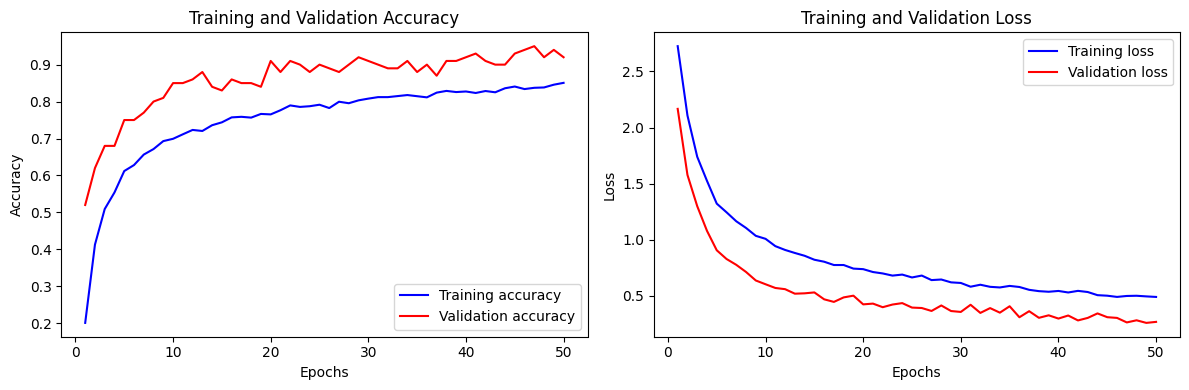

In [41]:
# Plot metrics

# Extracting training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [42]:
# Evaluate the model on the test data

test_loss, test_accuracy = model.evaluate(
    test_data,
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.8859 - loss: 0.2893
Test Loss: 0.24189502000808716
Test Accuracy: 0.9100000262260437


**Note:**

Test Accuracy is at 91%.

In [43]:
# Evaluation with Classification Report

from sklearn.metrics import classification_report

# Get the true labels from the test data
true_labels = test_data.classes

# Use the model to predict the classes
predicted_labels = np.argmax(model.predict(test_data), axis=1)

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_data.class_indices.keys()))

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step
Classification Report:
                             precision    recall  f1-score   support

           ABBOTTS BABBLER       0.80      0.80      0.80         5
             ABBOTTS BOOBY       1.00      0.40      0.57         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       0.75      0.60      0.67         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      1.00      1.00         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       0.62      1.00      0.77         5
            ALBERTS TOWHEE       0.83      1.00      0.91         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       1.00      0.80     

**Classification Report comments:** <br>

Accuracy is 91%. <br>

It terms of precision, recall, and f1-score, the bird species which were below 80% for at least one of these metrics were: <br>
ABBOTTS BOOBY, AFRICAN FIREFINCH, ALBATROSS, ALTAMIRA YELLOWTHROAT and AMERICAN GOLDFINCH

It terms of precision, recall, and f1-score, the bird species which were at 80% and above for all three metrics were: <br>
ABBOTTS BABBLER, ABYSSINIAN GROUND HORNBILL, AFRICAN CROWNED CRANE, AFRICAN EMERALD CUCKOO, AFRICAN OYSTER CATCHER, AFRICAN PIED HORNBILL, AFRICAN PYGMY GOOSE, ALBERTS TOWHEE, ALEXANDRINE PARAKEET, ALPINE CHOUGH, AMERICAN AVOCET, AMERICAN BITTERN, AMERICAN COOT, AMERICAN FLAMINGO and AMERICAN KESTREL. 



In [44]:
# Make a Prediction

from tensorflow.keras.preprocessing import image
import numpy as np
import os
from tensorflow.keras.applications.vgg16 import preprocess_input

# Using '2.jpg' from images_to_predict folder to make prediction

image_path = os.path.join(images_to_predict_dir, '2.jpg')

# Load image with target size (224, 224)
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a numpy array and expand its dimensions to match the batch shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image to be in the format expected by VGG16
img_array = preprocess_input(img_array)

# Use model to make prediction
predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions, axis=1)

# Map the predicted index to the actual class name
class_names = list(train_data.class_indices.keys())
predicted_class = class_names[predicted_class_index[0]]

# Display the prediction
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
Predicted class: AFRICAN CROWNED CRANE


**Prediction Comments:**

The predicted bird species was the AFRICAN CROWNED CRANE.

**Conclusion:** <br>
- At Epoch 50, Training Accuracy was 85.0686%.
- At Epoch 50, Validation Accuracy was 92%.
- After training, Test Accuracy was 91%. (meets criteria of having at least 85%)
- Classification Report Accuracy was 91%.
- Prediction: Using '2.jpg' from the 'images to predict' folder, the model predicted the bird species class to be the AFRICAN CROWNED CRANE.

End